In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline



In [2]:
data = pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
data.shape

(545, 13)

In [4]:
# Data analysis 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
# check for null values 

data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_2960\2658128398.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


<AxesSubplot: >

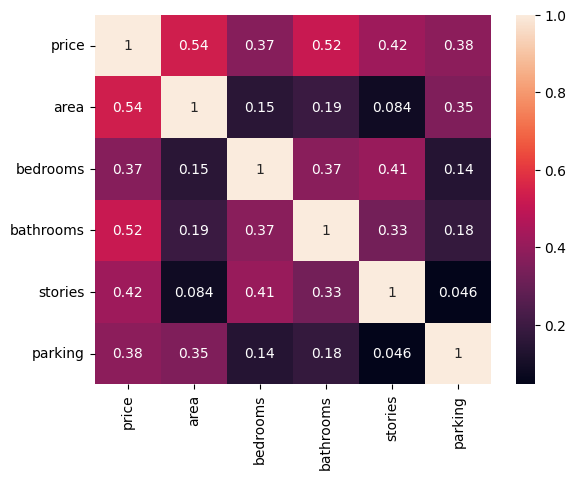

In [7]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix , annot = True )

In [8]:
data.columns 

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

# data visualization 


<AxesSubplot: xlabel='bedrooms', ylabel='count'>

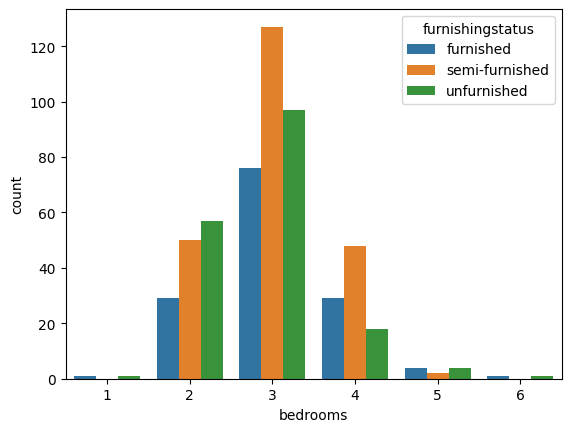

In [9]:
# the no of bedrooms wrt furnishing status 
sns.countplot(x = 'bedrooms' , data = data, hue = 'furnishingstatus')

------ Insights : 
            - the more houses have 3 bedrooms and mostly houses are semi and unfurnished , there are less amount of furnished 
                     houses wrt to unfurnished and semifurnished 
            

<AxesSubplot: xlabel='stories', ylabel='count'>

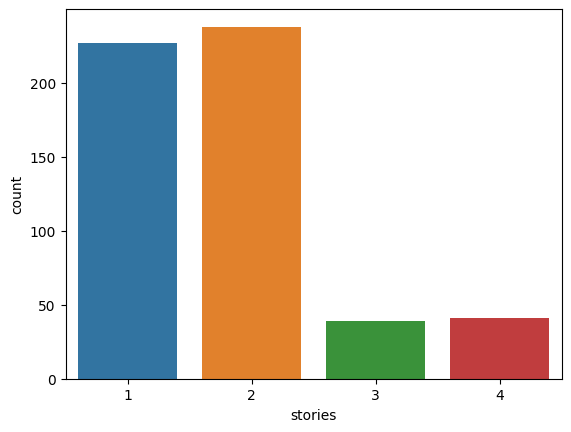

In [10]:
# No. of stories -------------
sns.countplot(x = 'stories' , data = data)

                        The maximum houses have 2 and 1 stories 

<AxesSubplot: xlabel='parking', ylabel='count'>

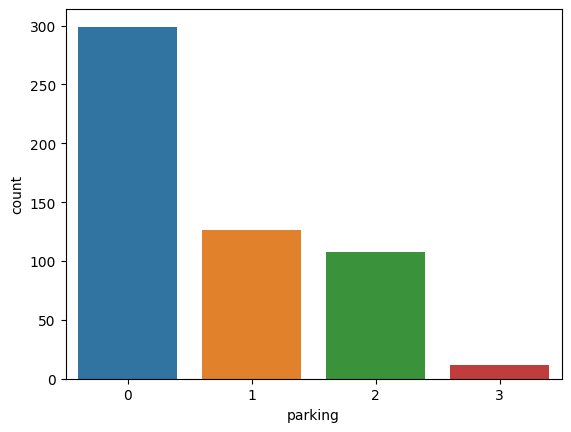

In [11]:
sns.countplot(x = 'parking' , data = data )

                    Insight : Most houses doesn't provides Parking faclity 

<AxesSubplot: xlabel='furnishingstatus', ylabel='count'>

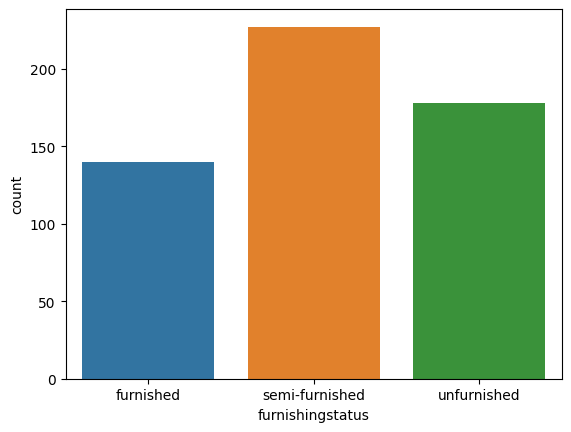

In [12]:
# -------- Furnishing status -------

sns.countplot(x= 'furnishingstatus' , data = data )

                Insight : Most of the houses are semi-furnished and unfurnished , the number 
                            of furnished houses  is low as compared to others !

In [13]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


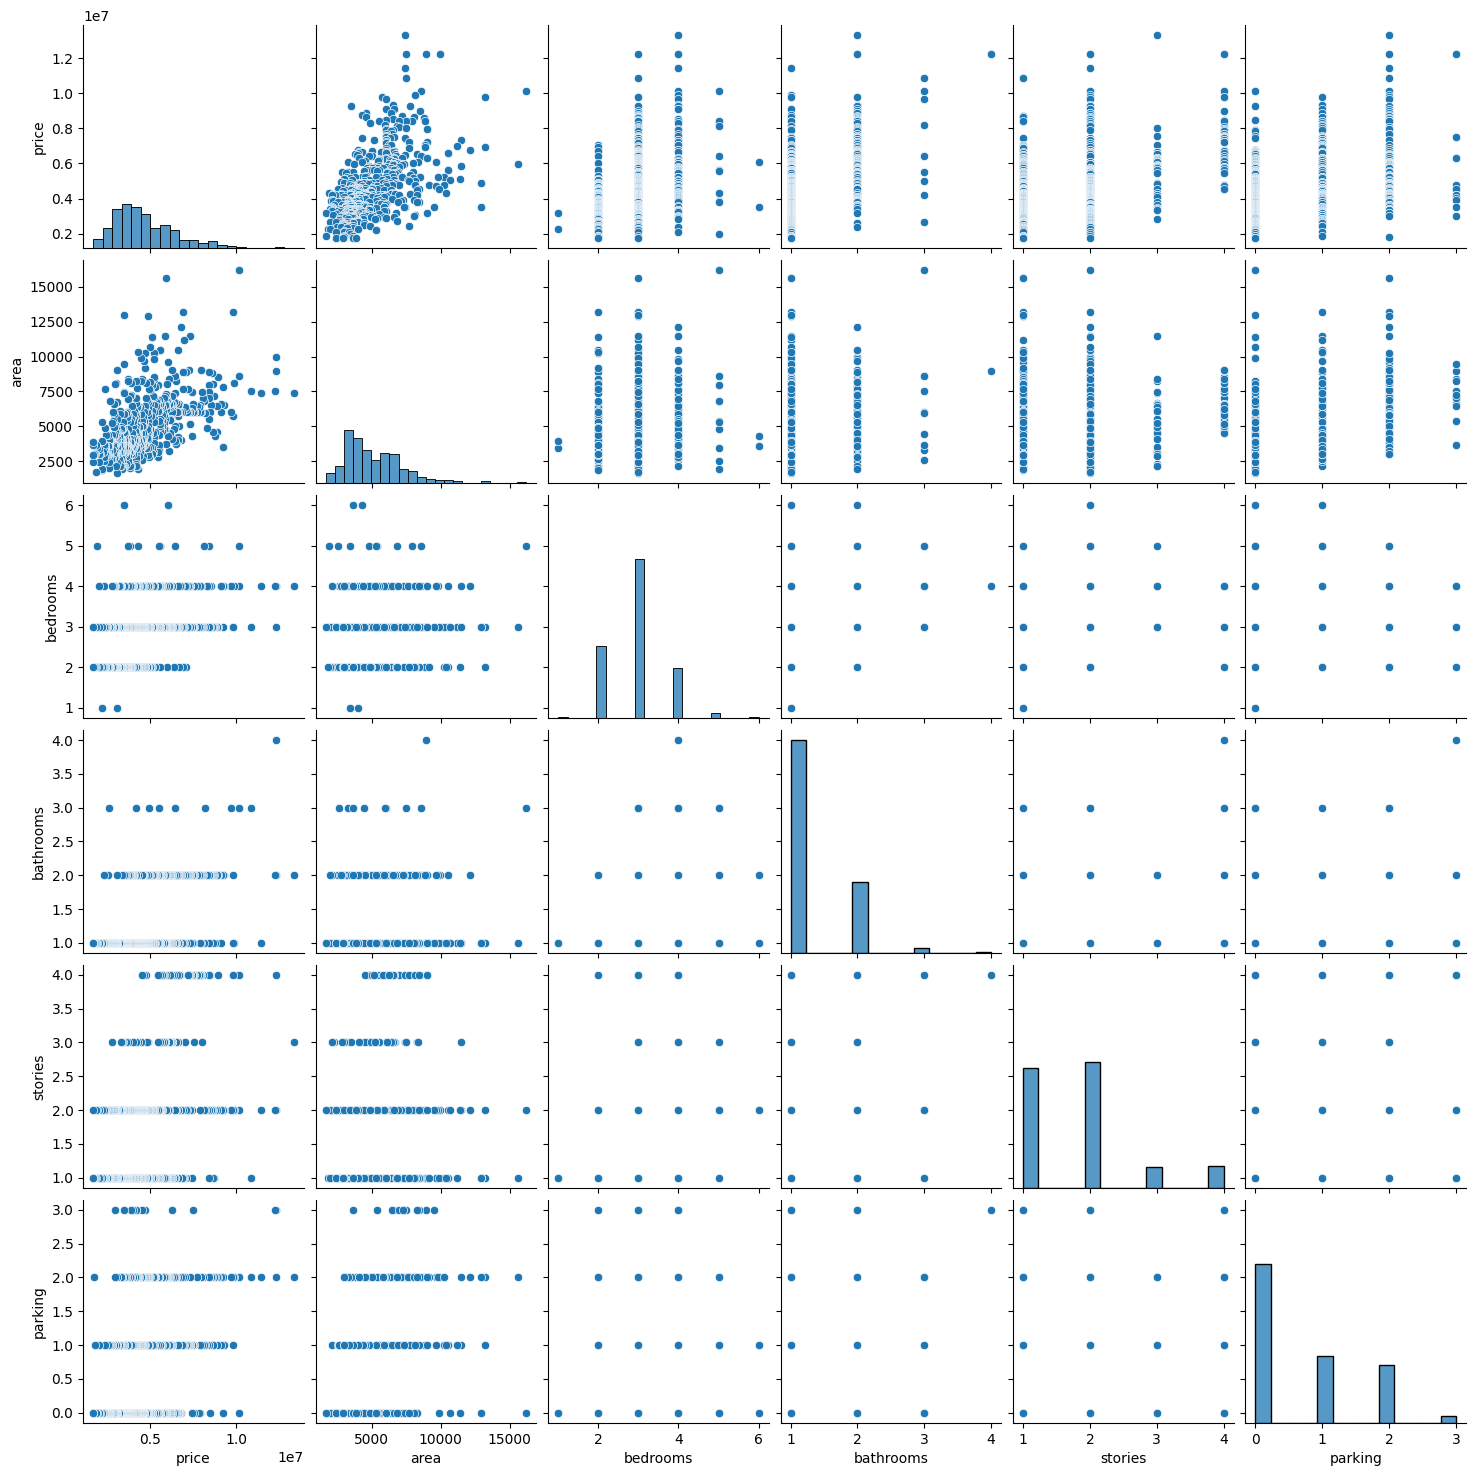

In [14]:
sns.pairplot(data)

In [15]:
# converting catgerical data into numerical data 

newdata = {
    'mainroad' : {'yes' : 1 , 'no' : 0}, 
    'guestroom' : {'yes' : 1 , 'no' : 0},
    'airconditioning' : {'yes' : 1 , 'no' : 0},
    'prefarea' : {'yes' : 1 , 'no' : 0},
    'basement' : {'yes' : 1 , 'no' : 0},
    'hotwaterheating' : {'yes' : 1 , 'no' : 0},
    'furnishingstatus' : {'furnished' : 2 , 'semi-furnished' : 1, 'unfurnished' : 0}
}

data.replace(newdata, inplace = True)


# dummy = pd.get_dummies(data.furnishingstatus)

# final = pd.concat([data , dummy] , axis = 1)

# final.drop(['furnishingstatus'] ,axis = 1 , inplace = True)


In [16]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


# Feature Engineering

In [17]:
X = data.drop(['price'], axis = 1 )
y = data['price']


from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 42)

X_train.shape , y_train.shape , X_test.shape , y_test.shape 


((381, 12), (381,), (164, 12), (164,))

In [18]:
# using kbest allgo 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif 


In [19]:
mi_score = mutual_info_classif(X_train, y_train)
mi_score_df = pd.DataFrame({'Features':  X_train.columns , 'mi_scorre' : mi_score})

In [20]:
impcols = mi_score_df.sort_values(by = 'mi_scorre', ascending = False)

In [21]:
impcols

,Features,mi_scorre
4,mainroad,3.030876
2,bathrooms,2.511030
0,area,1.054525
3,stories,0.969488
11,furnishingstatus,0.562454
9,parking,0.365938
8,airconditioning,0.356961
6,basement,0.289772
1,bedrooms,0.245275
5,guestroom,0.210747


Text(0.5, 1.0, 'Important features using Mutual info classification ')

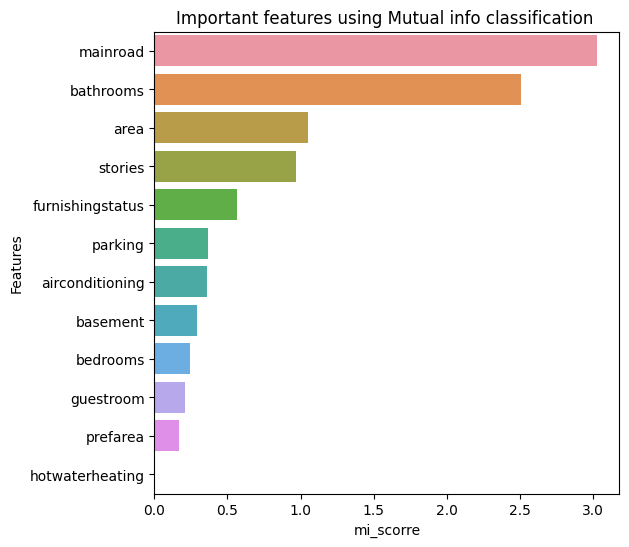

In [22]:
plt.figure(figsize = (6,6))
sns.barplot(y = impcols['Features'] , x = impcols['mi_scorre'])
plt.title("Important features using Mutual info classification ")

In [23]:


top6feat = SelectKBest(mutual_info_classif, k = 6)
top6feat.fit(X_train , y_train)
X_train.columns[top6feat.get_support()]


usefulness_score = top6feat.scores_
usefulness_score_df = pd.DataFrame({'Features':X_train.columns , 'Kbest Score': usefulness_score})
impp  = usefulness_score_df.sort_values(by = 'Kbest Score' , ascending = False)
impp

,Features,Kbest Score
4,mainroad,2.938137
2,bathrooms,2.680617
0,area,1.227377
3,stories,0.892702
11,furnishingstatus,0.641149
8,airconditioning,0.382208
5,guestroom,0.292724
9,parking,0.287990
1,bedrooms,0.164923
6,basement,0.153214


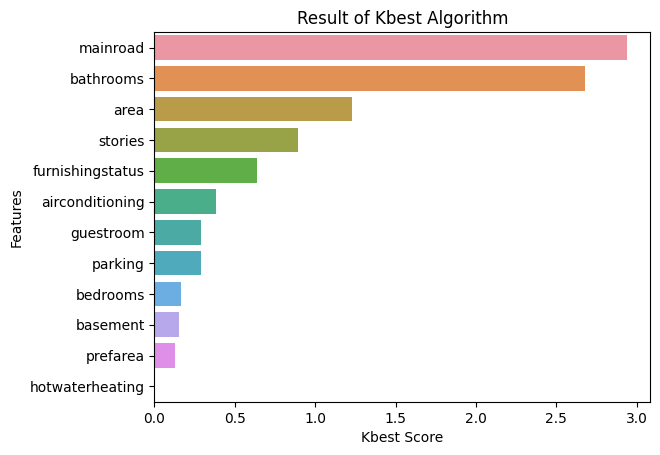

In [24]:
sns.barplot(x = 'Kbest Score' , y = 'Features' , data = impp)
plt.title("Result of Kbest Algorithm")
plt.show()

In [25]:
finaldf = data[['mainroad','bathrooms','area','stories','furnishingstatus','parking']]

In [26]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

In [27]:
X = finaldf
y = data['price']
X_train ,X_test, y_train , y_test = train_test_split(X, y , test_size = 0.3 , random_state= 42)

X_train.shape , y_train.shape , X_test.shape , y_test.shape 

((381, 6), (381,), (164, 6), (164,))

C:\Users\DELL\AppData\Local\Temp\ipykernel_2960\1104858246.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test , hist = False ,label = 'Actual' , color = 'r')
C:\Users\DELL\AppData\Local\Temp\ipykernel_2960\1104858246.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

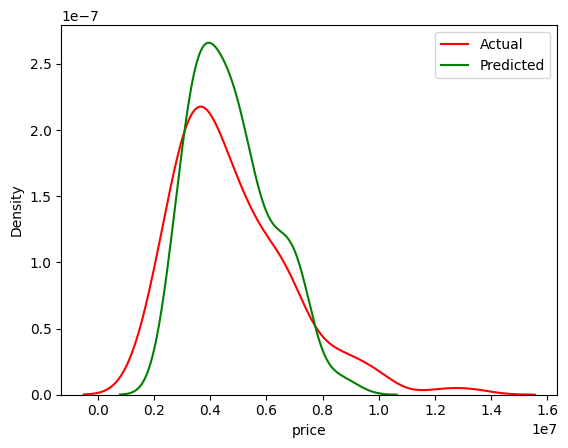

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train , y_train )

y_pred = model.predict(X_test)

# from sklearn.metrics import mean_absolute_error, mean_squared_error
# Distplot showing the distribution between the predicted and actual values 

ax = sns.distplot(y_test , hist = False ,label = 'Actual' , color = 'r')

sns.distplot(y_pred , hist = False , label = 'Predicted' , color='g' ,ax = ax  )
plt.legend()


In [31]:
model =XGBRegressor()
model.fit(X_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [32]:
# ---------- evaluation -------

y_pred = model.predict(X_test)
y_pred

array([ 6509848.5,  7468429.5,  5430085. ,  4226113.5,  3903139.5,
        2872371.8,  5402074. ,  6099581. ,  2599160.8,  2949086.5,
       10969044. ,  3275704. ,  2840749.2,  2644885.2,  3160579.8,
        4927026. ,  3190010.8,  4571366.5,  5052273. ,  4181483.5,
        5121049.5,  4489025. ,  3402047.8,  3192779.2,  4514062.5,
        5183945.5,  2259213.2,  5367441. ,  5856791.5,  4520052.5,
        5313223.5,  2172826. ,  6103596. ,  7623770. ,  4114831.5,
        6824211. ,  5459710. ,  3254408.2,  1832116.8,  4673955.5,
        5559328. ,  3402047.8,  7248200. ,  5095936.5,  3749108.5,
        3583560.5,  6330316. ,  5460542.5,  4836956.5,  3812815.2,
        9821059. ,  3221984.2,  5277110. ,  3939539.8,  3562443.5,
        3051019. ,  6742338.5,  3262593.8,  6190236. ,  3145273.5,
        5261140.5,  3892578.2,  5566750.5,  4058311.2,  3048304.2,
        4736029.5,  6620602. ,  3942328.8,  7189470. ,  4580924.5,
        4145189.8,  5252095.5,  4740701. ,  6582539.5,  265070

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn import metrics 


In [34]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 1224700.0213414633
Mean Squared Error: 2822022549859.2163
Root Mean Squared Error: 1679887.6598925346


In [35]:
score1= metrics.r2_score(y_test , y_pred)
score2 = metrics.mean_absolute_error(y_test , y_pred)

print("R2 score : ", score1)
print("MAE" , score2)

R2 score :  0.34468969238038016
MAE 1224700.0213414633


In [36]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error




regressors = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree Regressor", DecisionTreeRegressor()),
    ("Random Forest Regressor", RandomForestRegressor()),
    ("Ridge Regression",Ridge(alpha = 1.0)),
    ("lasso  regression " , Lasso(alpha = 1.0)),
    ("logistic regression ", LogisticRegression()),
    ("Support Vector Regressor", SVR()),
    ("gradient boost regressor ",GradientBoostingRegressor(n_estimators = 100)),
    
    ("XGBoost Regressor", XGBRegressor())
]


for name , model in regressors : 
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test , y_pred)
    r2_score = metrics.r2_score(y_test , y_pred)
    print(f"{name}: Mean Absolute Error = {mae:.2f}")
    print(f'{name} : R2score = {r2_score:.2f}')
    
    

    

    

Linear Regression: Mean Absolute Error = 1026998.75
Linear Regression : R2score = 0.55
Decision Tree Regressor: Mean Absolute Error = 1461184.70
Decision Tree Regressor : R2score = 0.07
Random Forest Regressor: Mean Absolute Error = 1189263.40
Random Forest Regressor : R2score = 0.38
Ridge Regression: Mean Absolute Error = 1027149.12
Ridge Regression : R2score = 0.55
lasso  regression : Mean Absolute Error = 1026998.89
lasso  regression  : R2score = 0.55
logistic regression : Mean Absolute Error = 1202614.94
logistic regression  : R2score = 0.36
Support Vector Regressor: Mean Absolute Error = 1578105.59
Support Vector Regressor : R2score = -0.04
gradient boost regressor : Mean Absolute Error = 1103952.36
gradient boost regressor  : R2score = 0.42
XGBoost Regressor: Mean Absolute Error = 1224700.02
XGBoost Regressor : R2score = 0.34


------- here we get that Gradient boosting regressor gives maximum accuracy then others !

In [38]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [39]:
X_train , X_test , y_train , y_test = train_test_split(data.drop(['price'],axis = 1 ), data['price'] , test_size = 0.3 , random_state = 42)
X_train.shape , X_test.shape , y_train.shape , y_test.shape 

((381, 12), (164, 12), (381,), (164,))

In [44]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
from sklearn.neighbors import KNeighborsRegressor
regressors = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree Regressor", DecisionTreeRegressor()),
    ("Random Forest Regressor", RandomForestRegressor()),
    ("KNN regressor " , KNeighborsRegressor(n_neighbors=5)),
    ("Ridge Regression",Ridge(alpha = 1.0)),
    ("lasso  regression " , Lasso(alpha = 1.0)),
    ("logistic regression ", LogisticRegression()),
    ("Support Vector Regressor", SVR()),
    ("gradient boost regressor ",GradientBoostingRegressor(n_estimators = 100)),
    
    ("XGBoost Regressor", XGBRegressor())
]


for name , model in regressors : 
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test , y_pred)
    r2_score = metrics.r2_score(y_test , y_pred)
    print(f"{name}: Mean Absolute Error = {mae:.2f}")
    print(f'{name} : R2score = {r2_score:.2f}')

Linear Regression: Mean Absolute Error = 905898.98
Linear Regression : R2score = 0.65
Decision Tree Regressor: Mean Absolute Error = 1327651.16
Decision Tree Regressor : R2score = 0.15
Random Forest Regressor: Mean Absolute Error = 992798.18
Random Forest Regressor : R2score = 0.53
KNN regressor : Mean Absolute Error = 968608.27
KNN regressor  : R2score = 0.57
Ridge Regression: Mean Absolute Error = 905799.10
Ridge Regression : R2score = 0.65
lasso  regression : Mean Absolute Error = 905899.01
lasso  regression  : R2score = 0.65
logistic regression : Mean Absolute Error = 1024648.48
logistic regression  : R2score = 0.53
Support Vector Regressor: Mean Absolute Error = 1578104.04
Support Vector Regressor : R2score = -0.04
gradient boost regressor : Mean Absolute Error = 993966.22
gradient boost regressor  : R2score = 0.57
XGBoost Regressor: Mean Absolute Error = 961291.01
XGBoost Regressor : R2score = 0.58


C:\Users\DELL\AppData\Local\Temp\ipykernel_2960\1300699098.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test , hist = False ,label = 'Actual' , color = 'r')
C:\Users\DELL\AppData\Local\Temp\ipykernel_2960\1300699098.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

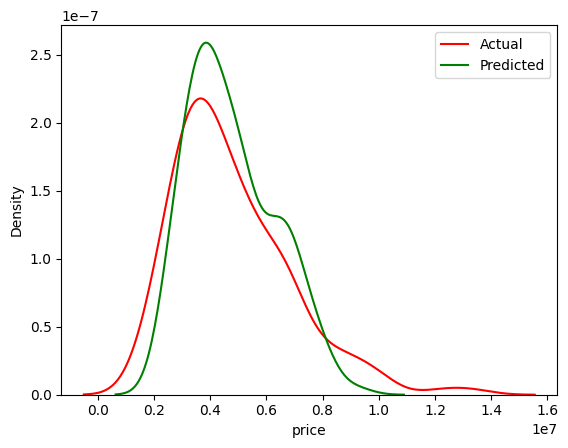

In [41]:
model = LinearRegression()
model.fit(X_train , y_train )

y_pred = model.predict(X_test)

# from sklearn.metrics import mean_absolute_error, mean_squared_error
# Distplot showing the distribution between the predicted and actual values 

ax = sns.distplot(y_test , hist = False ,label = 'Actual' , color = 'r')

sns.distplot(y_pred , hist = False , label = 'Predicted' , color='g' ,ax = ax  )
plt.legend()